In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split

In [151]:
from sklearn.preprocessing import StandardScaler

In [152]:
from sklearn.model_selection import KFold, cross_val_score

In [153]:
df = pd.read_csv('train.csv')

In [154]:
pd.options.display.max_rows = 85

In [155]:
pd.options.display.max_columns = 85

In [156]:
df.shape

(2051, 81)

In [157]:
df.isna().sum().head()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
dtype: int64

In [158]:
df.dropna(subset=['Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Cars', 'Garage Area', 'BsmtFin SF 1'], inplace = True)
#these have small sets of values with null values that can easily be afforded to be dropped for cleaner data 


In [159]:
df[df['Garage Type'].isna()] # These are very likely 0 values because there is no Garage

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
28,2243,911103060,190,C (all),75.0,8250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,2fmCon,2Story,5,6,1895,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,957.0,957.0,GasA,Fa,N,SBrkr,1034,957,0,1991,0.0,0.0,2,0,4,2,TA,9,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,133,0,0,0,NaN,NaN,NaN,0,6,2007,WD,119600
53,330,923226250,160,RM,21.0,1476,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,176.0,Unf,0.0,370.0,546.0,GasA,Ex,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,200,26,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,76000
65,2278,923202134,20,RL,70.0,8402,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Feedr,Norm,1Fam,1Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,ALQ,206.0,Unf,0.0,914.0,1120.0,GasA,Ex,Y,SBrkr,1120,0,0,1120,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,30,0,0,0,0,NaN,NaN,NaN,0,12,2007,New,147000
79,2235,910201050,50,RM,50.0,7288,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1925,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,Gd,BrkTil,TA,Po,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,665,0,1601,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,0,176,0,0,NaN,NaN,NaN,0,9,2007,WD,129850
101,2084,905476170,30,RL,58.0,9098,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,7,1920,2002,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,Mn,ALQ,348.0,Unf,0.0,180.0,528.0,GasA,Ex,Y,SBrkr,605,0,0,605,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,144,0,0,0,NaN,NaN,NaN,0,7,2007,WD,86000
103,728,902477130,30,C (all),72.0,9392,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,3,1900,1950,Mansard,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,CBlock,Fa,TA,No,Unf,0.0,Unf,0.0,245.0,245.0,GasA,TA,N,SBrkr,797,0,0,797,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,36,94,0,0,0,NaN,NaN,NaN,0,9,2009,WD,44000
114,781,905228050,20,RL,NaN,9000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,2,2,1947,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,SBrkr,660,0,0,660,0.0,0.0,1,0,2,1,Fa,5,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,100,0,0,0,NaN,NaN,NaN,0,6,2009,WD,63900
120,1492,908127120,30,RL,63.0,13907,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1940,1969,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,290.0,Unf,0.0,706.0,996.0,GasA,Ex,Y,SBrkr,996,0,0,996,1.0,0.0,1,0,3,1,TA,6,Typ,1,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,144,0,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,108000
134,1514,909100170,30,RL,67.0,5604,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1925,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,Unf,0.0,396.0,864.0,GasA,TA,N,FuseA,864,0,0,864,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,96,0,0,0,NaN,NaN,NaN,0,4,2008,WD,98000
136,216,905

In [183]:
df[df['Lot Frontage'].isna()]  #These are missing values - most of the Lot Area values seem listed.  Could remove these whole values

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,0,3,2010,WD,130500
7,145,535154050,20,RL,NaN,12160,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000.0,Unf,0.0,188.0,1188.0,GasA,Fa,Y,SBrkr,1188,0,0,1188,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1959.0,RFn,2.0,531.0,TA,TA,Y,0,0,0,0,0,0,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,292.0,Unf,0.0,632.0,924.0,GasA,TA,Y,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1952.0,Unf,1.0,420.0,TA,TA,Y,0,324,0,0,0,0,400,6,2007,WD,112500
23,12,527165230,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,500,3,2010,WD,185000
27,1534,909277040,50,RL,NaN,11700,Pave,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1937,1995,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,606.0,Unf,0.0,336.0,942.0,GasA,Ex,Y,SBrkr,1265,673,0,1938,0.0,0.0,2,0,4,1,Gd,7,Min2,1,Gd,Detchd,1937.0,Unf,1.0,240.0,TA,TA,Y,0,40,0,0,0,0,0,7,2008,WD,198000
31,2860,909276010,70,RL,NaN,11435,Pave,IR1,HLS,AllPub,Corner,Mod,Crawfor,Norm,Norm,1Fam,2Story,8,7,1929,1950,Gable,CompShg,BrkFace,Stucco,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,792.0,792.0,GasA,Fa,Y,SBrkr,792,725,0,1517,0.0,0.0,1,0,3,1,Gd,7,Typ,2,Gd,Detchd,1931.0,Unf,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,0,6,2006,WD,230000
42,983,923275040,85,RL,NaN,9101,Pave,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,6,1978,1978,Gable,CompShg,Plywood,Plywood,BrkFace,104.0,TA,Gd,PConc,Gd,TA,Av,GLQ,1097.0,Unf,0.0,0.0,1097.0,GasA,Ex,Y,SBrkr,1110,0,0,1110,1.0,0.0,1,0,1,1,Gd,4,Typ,1,TA,Attchd,1978.0,Fin,2.0,602.0,TA,TA,Y,303,30,0,0,0,0,0,7,2009,WD,165500
50,2511,533221080,160,FV,NaN,2998,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,2000,2000,Gable,CompShg,MetalSd,MetalSd,BrkFace,513.0,Gd,TA,PConc,Gd,TA,No,GLQ,353.0,Unf,0.0,403.0,756.0,GasA,Ex,Y,SBrkr,768,756,0,1524,0.0,0.0,2,1,2,1,Gd,4,Typ,0,NaN,Detchd,2000.0,Unf,2.0,440.0,TA,TA,Y,0,32,0,0,0,0,0,6,2006,WD,166000
59,997,527107010,60,RL,NaN,15038,Pave,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1996,1996,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Rec,138.0,Unf,0.0,778.0,916.0,GasA,Gd,Y,SBrkr,916,720,0,1636,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1996.0,Fin,2.0,386.0,TA,TA,Y,168,84,0,0,0,0,0,11,2008,WD,173000
62,230,905109170,20,RL,NaN,20062,Pave,IR1,Low,AllPub,Inside,Mod,ClearCr,Norm,Norm,1Fam,1Story,7,7,1977,2001,Hip,CompShg,Wd 

In [ ]:
#df[df['Garage Type'].map(replace('NaN', 'Na'))

In [184]:
df.dropna(axis = 1, thresh = 500, inplace = True) #Dropping all columns with more than 500 NaN values

In [187]:
df.isnull().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           53
Bsmt Cond           53
Bsmt Exposure       56
BsmtFin Type 1      53
BsmtFin SF 1         0
BsmtFin Type 2      54
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical           0
1st Flr SF 

In [188]:
df.drop(columns=['Fireplace Qu'], inplace = True)

KeyError: "['Fireplace Qu'] not found in axis"

In [189]:
#df.dropna(subset=['name', 'born'], inplace = True)

In [190]:
holdout = pd.read_csv('test.csv')

In [191]:
holdout.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0.0,Unf,0.0,1020.0,1020.0,GasA,Gd,N,FuseP,908,1020,0,1928,0.0,0.0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1.0,440.0,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,1967.0,1967.0,GasA,TA,Y,SBrkr,1967,0,0,1967,0.0,0.0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2.0,580.0,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554.0,Unf,0.0,100.0,654.0,GasA,Ex,Y,SBrkr,664,832,0,1496,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2.0,426.0,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,968.0,968.0,GasA,TA,Y,SBrkr,968,0,0,968,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2.0,480.0,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609.0,Unf,0.0,785.0,1394.0,GasA,Gd,Y,SBrkr,1394,0,0,1394,1.0,0.0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2.0,514.0,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [209]:
X = df[['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd', 'Fireplaces', 'PID', 'Enclosed Porch', 
       'Wood Deck SF', 'Half Bath', '2nd Flr SF']]



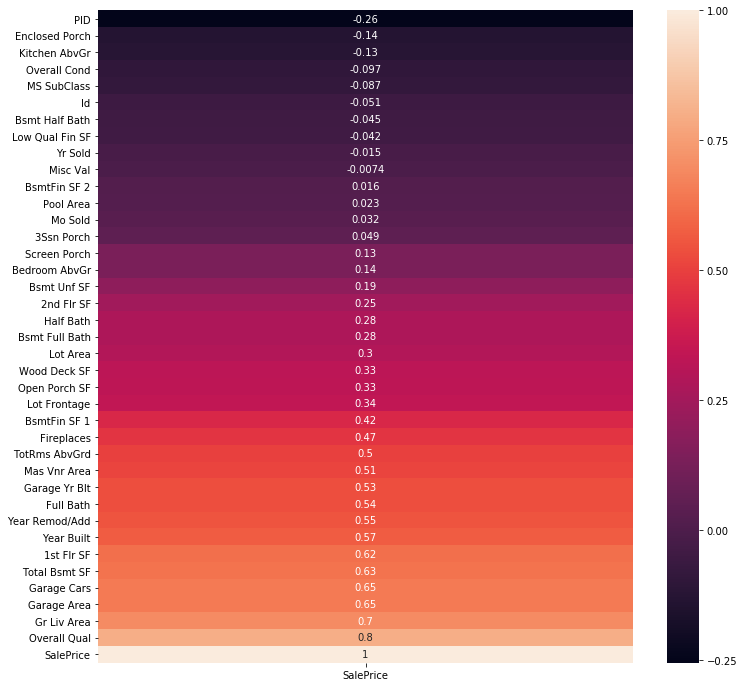

In [194]:
plt.subplots(figsize = (12, 12))
sns.heatmap(df.corr()[['SalePrice']].sort_values('SalePrice'), annot= True)

In [195]:
X.isna().sum()

Overall Qual        0
Gr Liv Area         0
Total Bsmt SF       0
1st Flr SF          0
Year Built          0
Year Remod/Add      0
Full Bath           0
TotRms AbvGrd       0
Fireplaces          0
Lot Frontage      330
PID                 0
Enclosed Porch      0
Wood Deck SF        0
Half Bath           0
2nd Flr SF          0
dtype: int64

In [196]:
#X = df.loc[:, ['Gr Liv Area', 'Year Built', 'Full Bath']]
y = df['SalePrice']

In [197]:
X.shape

(2048, 15)

In [199]:
X.head()

,Overall Qual,Gr Liv Area,Total Bsmt SF,1st Flr SF,Year Built,Year Remod/Add,Full Bath,TotRms AbvGrd,Fireplaces,Lot Frontage,PID,Enclosed Porch,Wood Deck SF,Half Bath,2nd Flr SF
0,6,1479,725.0,725,1976,2005,2,6,0,NaN,533352170,0,0,1,754
1,7,2122,913.0,913,1996,1997,2,8,1,43.0,531379050,0,0,1,1209
2,5,1057,1057.0,1057,1953,2007,1,5,0,68.0,535304180,0,0,0,0
3,5,1444,384.0,744,2006,2007,2,7,0,73.0,916386060,0,100,1,700
4,6,1445,676.0,831,1900,1993,2,6,0,82.0,906425045,0,0,0,614


In [200]:
df.dtypes.head()

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
dtype: object

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [213]:
ss = StandardScaler()
ss.fit(X_train) 
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)  #Is this ok??  Do I need the unscaled training data after this?

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [214]:
holdout_scaled = ss.transform(holdout[['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add', 'Full Bath', 'TotRms AbvGrd', 'Fireplaces', 'PID', 'Enclosed Porch', 
       'Wood Deck SF', 'Half Bath', '2nd Flr SF']])
                                      

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [215]:
df.corr()[['SalePrice']].sort_values('SalePrice')

,SalePrice
PID,-0.255293
Enclosed Porch,-0.135516
Kitchen AbvGr,-0.125593
Overall Cond,-0.097118
MS SubClass,-0.087383
Id,-0.051399
Bsmt Half Bath,-0.045378
Low Qual Fin SF,-0.041650
Yr Sold,-0.015330
Misc Val,-0.007398


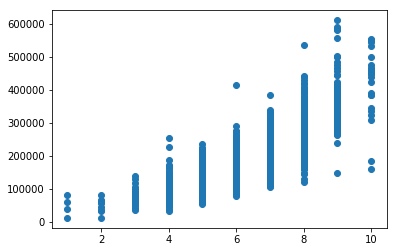

In [216]:
plt.scatter(X['Overall Qual'], y)

In [217]:
#plt.subplots(figsize = (40, 40))
#sns.heatmap(df.corr(), annot = True)

In [148]:
#plt.subplots(20, 20)
#sns.heatmap(X.corr(), annot = True)


In [218]:
print('X training data shape is', X_train.shape)
print('X testing data shape is', X_test.shape)
print('y training data shape is', y_train.shape)
print('y testing data shape is', y_test.shape)
print('holdout scaled shape is', holdout_scaled.shape)

X training data shape is (1536, 14)
X testing data shape is (512, 14)
y training data shape is (1536,)
y testing data shape is (512,)
holdout scaled shape is (879, 14)


In [219]:
lr = LinearRegression()
lr.fit(X_train, y_train)
cv_scores = cross_val_score(lr, X_train, y_train, cv=8)
preds = lr.predict(holdout_scaled)

In [220]:
preds[:10]

array([152493.44281774, 206862.26831469, 209127.40767979, 116518.19053215,
       187359.20660618,  87616.72753605, 112435.2565384 , 151432.08427008,
       200258.7878894 , 188001.61927418])

In [221]:
sub = holdout[['Id']]

In [222]:
sub['SalePrice'] = preds

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [223]:
sub.shape

(879, 2)

In [226]:
print('cv score', cross_val_score(lr, X_train, y_train, cv=10).mean())
print('train score', lr.score(X_train, y_train))
print('test score', lr.score(X_test,y_test))

cv score 0.758236241605793
train score 0.7775217366599345
test score 0.8216272255586999


In [227]:
sub.to_csv('kaggle_sub_7.csv', index=False)